In [2]:
import numpy as np
from math import *
from pylab import *
def read_file ( filename ):

    # lecture de l'en-téte
    infile = open ( filename, "r" )
    for ligne in infile:
        if ligne.find ( "eruptions waiting" ) != -1:
            break
# ici, on a la liste des temps d'éruption et des délais d'irruptions
    data = []
    for ligne in infile:
        nb_ligne, eruption, waiting = [ float (x) for x in ligne.split () ]
        data.append ( eruption )
        data.append ( waiting )
    infile.close ()
# transformation de la liste en tableau 2D
    data = np.asarray ( data )
    data.shape = ( int ( data.size / 2 ), 2 )
    return data
data = read_file ( "2015_tme4_faithful.txt" )

In [3]:
data

array([[ 3.6  , 79.   ],
       [ 1.8  , 54.   ],
       [ 3.333, 74.   ],
       [ 2.283, 62.   ],
       [ 4.533, 85.   ],
       [ 2.883, 55.   ],
       [ 4.7  , 88.   ],
       [ 3.6  , 85.   ],
       [ 1.95 , 51.   ],
       [ 4.35 , 85.   ],
       [ 1.833, 54.   ],
       [ 3.917, 84.   ],
       [ 4.2  , 78.   ],
       [ 1.75 , 47.   ],
       [ 4.7  , 83.   ],
       [ 2.167, 52.   ],
       [ 1.75 , 62.   ],
       [ 4.8  , 84.   ],
       [ 1.6  , 52.   ],
       [ 4.25 , 79.   ],
       [ 1.8  , 51.   ],
       [ 1.75 , 47.   ],
       [ 3.45 , 78.   ],
       [ 3.067, 69.   ],
       [ 4.533, 74.   ],
       [ 3.6  , 83.   ],
       [ 1.967, 55.   ],
       [ 4.083, 76.   ],
       [ 3.85 , 78.   ],
       [ 4.433, 79.   ],
       [ 4.3  , 73.   ],
       [ 4.467, 77.   ],
       [ 3.367, 66.   ],
       [ 4.033, 80.   ],
       [ 3.833, 74.   ],
       [ 2.017, 52.   ],
       [ 1.867, 48.   ],
       [ 4.833, 80.   ],
       [ 1.833, 59.   ],
       [ 4.783, 90.   ],


In [4]:
def normale_bidim(x,z,parameters):
    u_x,u_z,sigma_x,sigma_z,rho=parameters[0],parameters[1],parameters[2],parameters[3],parameters[4]
    f=(1/(2*pi*sigma_x*sigma_z*sqrt(1-rho**2)))*exp((-1/(2*(1-rho**2)))*(((x-u_x)/sigma_x)**2-2*rho*((x-u_x)*(z-u_z)/(sigma_x*sigma_z))+((z-u_z)/sigma_z)**2))
    return f
normale_bidim(1,2,(1.0,2.0,3.0,4.0,0))

0.013262911924324612

In [5]:
normale_bidim(1,2,(1.0,2.0,3.0,4.0,0))
normale_bidim ( 1, 0, (1.0,2.0,1.0,2.0,0.7) )

0.0418047994276145

In [6]:
import matplotlib.pyplot as plt
def dessine_1_normale ( params ):
    # récupération des paramétres
    mu_x, mu_z, sigma_x, sigma_z, rho = params
    # on détermine
    x_min = mu_x - 2 * sigma_x
    x_max = mu_x + 2 * sigma_x
    z_min = mu_z - 2 * sigma_z
    z_max = mu_z + 2 * sigma_z
   

    # création de la grille
    x = np.linspace ( x_min, x_max, 100 )
    z = np.linspace ( z_min, z_max, 100 )
    X, Z = np.meshgrid(x, z)
    # calcul des normales
    norm = X.copy ()
    for i in range ( x.shape[0] ):
        for j in range ( z.shape[0] ):
            norm[i,j] = normale_bidim ( x[i], z[j], params )
# affichage
    fig = plt.figure ()
    plt.contour ( X, Z, norm, cmap=cm.autumn )
    plt.show ()

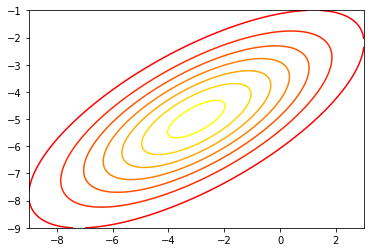

In [7]:
dessine_1_normale ( (-3.0,-5.0,3.0,2.0,0.7) )

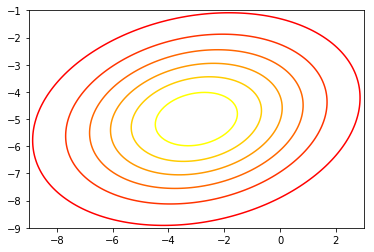

In [8]:
dessine_1_normale ( (-3.0,-5.0,3.0,2.0,0.2) )

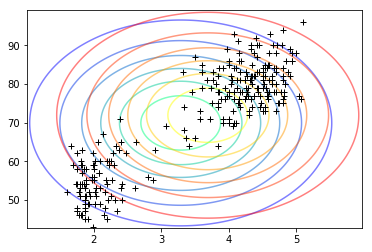

In [9]:
def dessine_normales ( data, params, weights, bounds, ax ):
    # récupération des paramètres
    mu_x0, mu_z0, sigma_x0, sigma_z0, rho0 = params[0]
    mu_x1, mu_z1, sigma_x1, sigma_z1, rho1 = params[1]

    # on détermine les coordonnées des coins de la figure
    x_min = bounds[0]
    x_max = bounds[1]
    z_min = bounds[2]
    z_max = bounds[3]

    # création de la grille
    nb_x = nb_z = 100
    x = np.linspace ( x_min, x_max, nb_x )
    z = np.linspace ( z_min, z_max, nb_z )
    X, Z = np.meshgrid(x, z)

    # calcul des normales
    norm0 = np.zeros ( (nb_x,nb_z) )
    for j in range ( nb_z ):
        for i in range ( nb_x ):
            norm0[j,i] = normale_bidim ( x[i], z[j], params[0] )# * weights[0]
    norm1 = np.zeros ( (nb_x,nb_z) )
    for j in range ( nb_z ):
        for i in range ( nb_x ):
             norm1[j,i] = normale_bidim ( x[i], z[j], params[1] )# * weights[1]

    # affichages des normales et des points du dataset
    ax.contour ( X, Z, norm0, cmap=cm.winter, alpha = 0.5 )
    ax.contour ( X, Z, norm1, cmap=cm.autumn, alpha = 0.5 )
    for point in data:
        ax.plot ( point[0], point[1], 'k+' )


def find_bounds ( data, params ):
    # récupération des paramètres
    mu_x0, mu_z0, sigma_x0, sigma_z0, rho0 = params[0]
    mu_x1, mu_z1, sigma_x1, sigma_z1, rho1 = params[1]

    # calcul des coins
    x_min = min ( mu_x0 - 2 * sigma_x0, mu_x1 - 2 * sigma_x1, data[:,0].min() )
    x_max = max ( mu_x0 + 2 * sigma_x0, mu_x1 + 2 * sigma_x1, data[:,0].max() )
    z_min = min ( mu_z0 - 2 * sigma_z0, mu_z1 - 2 * sigma_z1, data[:,1].min() )
    z_max = max ( mu_z0 + 2 * sigma_z0, mu_z1 + 2 * sigma_z1, data[:,1].max() )

    return ( x_min, x_max, z_min, z_max )


# affichage des données : calcul des moyennes et variances des 2 colonnes
mean1 = data[:,0].mean ()
mean2 = data[:,1].mean ()
std1  = data[:,0].std ()
std2  = data[:,1].std ()

# les paramètres des 2 normales sont autour de ces moyennes
params = np.array ( [(mean1 - 0.2, mean2 - 1, std1, std2, 0),
                     (mean1 + 0.2, mean2 + 1, std1, std2, 0)] )
weights = np.array ( [0.4, 0.6] )
bounds = find_bounds ( data, params )

# affichage de la figure
fig = plt.figure ()
ax = fig.add_subplot(111)
dessine_normales ( data, params, weights, bounds, ax )
plt.show ()




In [10]:
def Q_i(data,current_params, current_weights):
    t=[]
    mux0,muz0,sigmax0,sigmaz0,rho0,mux1,muz1,sigmax1,sigmaz1,rho1=current_params[0][0],current_params[0][1],current_params[0][2],current_params[0][3],current_params[0][4],current_params[1][0],current_params[1][1],current_params[1][2],current_params[1][3],current_params[1][4]
    for couple in data:
        x=couple[0]
        z=couple[1]
        #Calcul des probabilités Qi(y0) et Qi(y1) 
        alphazero=current_weights[0]*(1/(2*math.pi*sigmax0*sigmaz0*math.sqrt(1-rho0**2)))*exp((-1/(2*(1-rho0**2)))*(((x-mux0)/sigmax0)**2-2*rho0*((x-mux0)*(z-muz0)/(sigmax0*sigmaz0))+((z-muz0)/sigmaz0)**2))
        alphaun=current_weights[1]*(1/(2*math.pi*sigmax1*sigmaz1*math.sqrt(1-rho1**2)))*exp((-1/(2*(1-rho1**2)))*(((x-mux1)/sigmax1)**2-2*rho1*((x-mux1)*(z-muz1)/(sigmax1*sigmaz1))+((z-muz1)/sigmaz1)**2))
        q0=alphazero/(alphazero+alphaun)
        q1=alphaun/(alphazero+alphaun)
        t.append((q0,q1))
    T=np.array(t)
    return T
        
        
        
        
current_params = np.array([[ 3.28778309, 69.89705882, 1.13927121, 13.56996002, 0. ],
                           [ 3.68778309, 71.89705882, 1.13927121, 13.56996002, 0. ]])
current_weights = np.array ( [ 0.5, 0.5 ] )


In [11]:
T = Q_i ( data, current_params, current_weights )

In [12]:
print(T)

[[0.46939088 0.53060912]
 [0.66899936 0.33100064]
 [0.50349992 0.49650008]
 [0.61489199 0.38510801]
 [0.38336517 0.61663483]
 [0.58880846 0.41119154]
 [0.36370054 0.63629946]
 [0.45319835 0.54680165]
 [0.66597113 0.33402887]
 [0.39678193 0.60321807]
 [0.66674347 0.33325653]
 [0.43178097 0.56821903]
 [0.42637974 0.57362026]
 [0.68892521 0.31107479]
 [0.37635861 0.62364139]
 [0.6484613  0.3515387 ]
 [0.65298434 0.34701566]
 [0.36662753 0.63337247]
 [0.68719135 0.31280865]
 [0.41996736 0.58003264]
 [0.67617442 0.32382558]
 [0.68892521 0.31107479]
 [0.48363046 0.51636954]
 [0.53749981 0.46250019]
 [0.41197248 0.58802752]
 [0.45858658 0.54141342]
 [0.65505529 0.34494471]
 [0.44056782 0.55943218]
 [0.45294617 0.54705383]
 [0.40629466 0.59370534]
 [0.43213395 0.56786605]
 [0.40900976 0.59099024]
 [0.52258721 0.47741279]
 [0.43366997 0.56633003]
 [0.46503453 0.53496547]
 [0.65892553 0.34107447]
 [0.67878225 0.32121775]
 [0.37438794 0.62561206]
 [0.65456976 0.34543024]
 [0.35282612 0.64717388]


In [13]:
def M_step(data,T,current_params,current_weights):
    
    
    # Estimation des deux nouveau quintuplets de paramètres grâce aux formules
    
    Pi0= np.sum(T[:,0]) / np.sum(T[:,0]+T[:,1])
    mu_x0= np.sum(T[:,0]*data[:,0]) / np.sum(T[:,0])
    mu_z0= np.sum(T[:,0]*data[:,1]) / np.sum(T[:,0])
             
    sigma_x0 = ((np.dot(T[:,0],(data[:,0]-mu_x0)**2))/(np.sum(T[:,0])))** 0.5
    sigma_z0 = ((np.dot(T[:,0],(data[:,1]-mu_z0)**2))/(np.sum(T[:,0])))** 0.5
    
    rho0 = (np.sum(T[:,0]* ((data[:,0]-mu_x0 )* (data[:,1]-mu_z0) )/ (sigma_x0*sigma_z0))) / (np.sum(T[:,0]))
    
    Pi1= np.sum(T[:,1]) / np.sum(T[:,0]+T[:,1])
    mu_x1= np.sum(T[:,1]*data[:,0]) / np.sum(T[:,1])
    mu_z1= np.sum(T[:,1]*data[:,1]) / np.sum(T[:,1])
    
    sigma_x1 = ((np.dot(T[:,1],(data[:,0]-mu_x1)**2))/(np.sum(T[:,1])))** 0.5
    sigma_z1 = ((np.dot(T[:,1],(data[:,1]-mu_z1)**2))/(np.sum(T[:,1])))** 0.5
    
    rho1 = (np.sum(T[:,1]* ((data[:,0]-mu_x1 )* (data[:,1]-mu_z1) )/ (sigma_x1*sigma_z1))) / (np.sum(T[:,1]))
    
    
    current_params[0]= mu_x0, mu_z0, sigma_x0, sigma_z0, rho0
    current_params[1]= mu_x1, mu_z1, sigma_x1, sigma_z1, rho1
    
    return current_params,[Pi0,Pi1]
                                                                                                
                                                                                                

In [14]:
current_params = array([(2.51460515, 60.12832316, 0.90428702, 11.66108819, 0.86533355),
                        (4.2893485,  79.76680985, 0.52047055,  7.04450242, 0.58358284)])
current_weights = array([ 0.45165145,  0.54834855])
Q = Q_i ( data, current_params, current_weights )
M_step ( data, Q, current_params, current_weights )

(array([[ 2.33418412, 58.06784269,  0.74224878, 10.17591317,  0.82161824],
        [ 4.33880698, 80.36132657,  0.37819574,  5.71033527,  0.3008745 ]]),
 [0.4245306744232717, 0.5754693255767283])

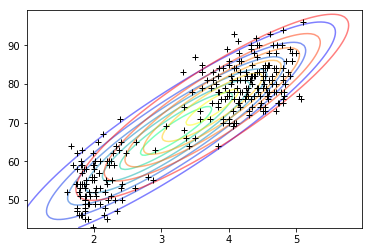

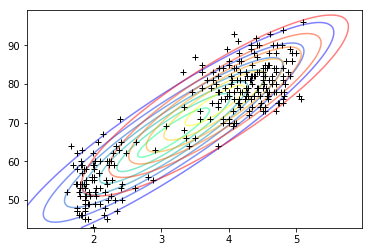

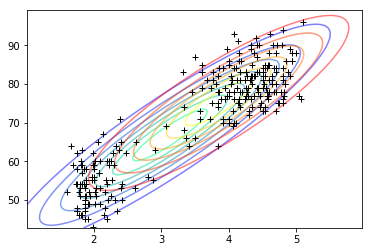

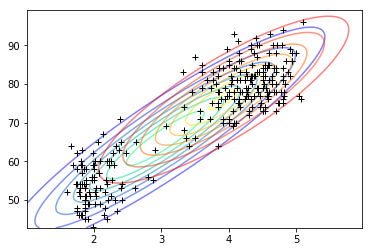

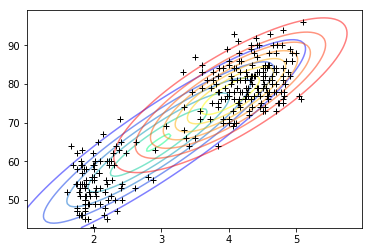

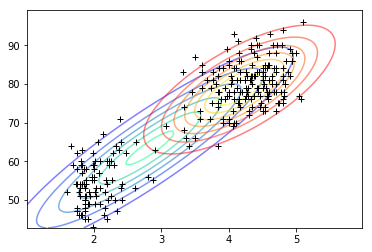

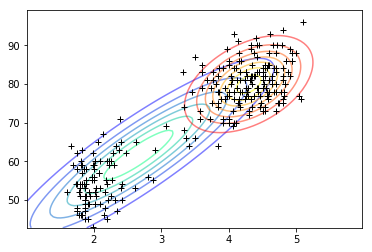

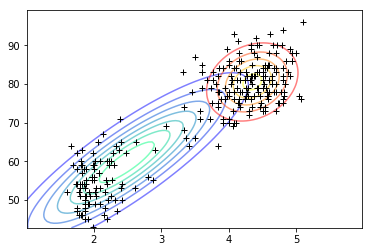

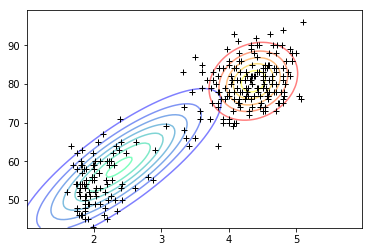

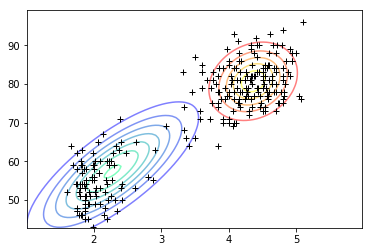

In [15]:
mean1 = data[:,0].mean ()
mean2 = data[:,1].mean ()
std1 = data[:,0].std ()
std2 = data[:,1].std ()
params = np.array ( [(mean1 - 0.2, mean2 - 1, std1, std2, 0),
(mean1 + 0.2, mean2 + 1, std1, std2, 0)] )
weights = np.array ( [ 0.5, 0.5 ] )


#on actualise les probas et les quintuplets de paramètres et on dessine les deux lois normales en fonction de ces paramètres 

for i in range(10):
    T=Q_i(data, params, weights )
    M_step(data,T,params, weights)
    fig = plt.figure ()
    ax = fig.add_subplot(111)
    dessine_normales ( data, params, weights, bounds, ax )
    plt.show ()

In [27]:
mean1 = data[:,0].mean ()
mean2 = data[:,1].mean ()
std1 = data[:,0].std ()
std2 = data[:,1].std ()
params = np.array ( [(mean1 - 0.2, mean2 - 1, std1, std2, 0),
(mean1 + 0.2, mean2 + 1, std1, std2, 0)] )
weights = np.array ( [ 0.5, 0.5 ] )
res_EM=[]


for i in range(20):
    
    T=Q_i(data, params, weights )
    M_step(data,T,params, weights)
    res_EM.append(M_step(data,T,params, weights))
    
    #même chose sauf que l'on met les résultats dans une liste 

    

print(res_EM)


# /!\ Je n'arrive pas à faire une animation, les paramètres ne semblent pas changer 
# avec les indices de la liste

# calcul des bornes pour contenir toutes les lois normales calculées
def find_video_bounds ( data, res_EM ):
    bounds = np.asarray ( find_bounds ( data, res_EM[0][0] ) )
    for param in res_EM:
        new_bound = find_bounds ( data, param[0] )
        for i in [0,2]:
            bounds[i] = min ( bounds[i], new_bound[i] )
        for i in [1,3]:
            bounds[i] = max ( bounds[i], new_bound[i] )
    return bounds
bounds = find_video_bounds ( data, res_EM )


import matplotlib.animation as animation

# création de l'animation : tout d'abord on crée la figure qui sera animée
fig = plt.figure ()
ax = fig.gca (xlim=(bounds[0], bounds[1]), ylim=(bounds[2], bounds[3]))
# la fonction appelée é chaque pas de temps pour créer l'animation
def animate ( i ):
    ax.cla ()
    dessine_normales (data, res_EM[i][0], res_EM[i][1], bounds, ax)
    ax.text(5, 40, 'step = ' + str ( i ))
    print ("step animate = %d" % ( i ))
# exécution de l'animation
anim = animation.FuncAnimation(fig, animate,
frames = len ( res_EM ), interval=500 )
plt.show ()
anim.save('old_faithful.avi', bitrate=4000)

[[ 3.28778309 69.89705882  1.13927121 13.56996002  0.        ]
 [ 3.68778309 71.89705882  1.13927121 13.56996002  0.        ]]
[0.5 0.5]


TypeError: data type not understood